In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.datasets import make_regression

# Import your Lasso methods (coordinate descent, ISTA, FISTA, etc.)
from methods.lasso_cd import lasso_coordinate_descent
from methods.lasso_fista import lasso_fista
from methods.lasso_ista import lasso_ista
from methods.square_root_lasso import square_root_lasso

Converged at iteration 2090
FISTA converged at iteration 2313
ISTA converged at iteration 60046
FISTA converged at iteration 498
FISTA converged at iteration 622
FISTA converged at iteration 795
FISTA converged at iteration 876
FISTA converged at iteration 1051
FISTA converged at iteration 1107
FISTA converged at iteration 1222
FISTA converged at iteration 1383
FISTA converged at iteration 1799
FISTA converged at iteration 1943
FISTA converged at iteration 2537
FISTA converged at iteration 2373
FISTA converged at iteration 2617
FISTA converged at iteration 2453
FISTA converged at iteration 2116
FISTA converged at iteration 2308
FISTA converged at iteration 2135
FISTA converged at iteration 2091
FISTA converged at iteration 2813
FISTA converged at iteration 2048
FISTA converged at iteration 2824
FISTA converged at iteration 2635
FISTA converged at iteration 3391
FISTA converged at iteration 3828
FISTA converged at iteration 3695
FISTA converged at iteration 3053
FISTA converged at itera

,Experiment,Method,n_informative,noise,time,n_selected,correct_count,false_positives,fraction_recovered,beta_history
0,experiment_1,lasso_cd,20,0,20.595635,56,20,36,1.000,"[[-17.499563333944778, 18.78599186689648, -64...."
1,experiment_1,lasso_fista,20,0,0.100371,57,20,37,1.000,"[[-1.0330783300861863, 0.951595880935711, -3.8..."
2,experiment_1,lasso_ista,20,0,2.001393,57,20,37,1.000,"[[-1.0330783300861863, 0.951595880935711, -3.8..."
3,experiment_1,square_root_lasso,20,0,178.121205,69,20,49,1.000,"[(158.80540431088008, [-0.0, 0.0, -0.0, 0.0, -..."
4,experiment_1,lasso_cd,20,3,37.487092,97,19,78,0.950,"[[-10.7864401890101, -3.7470078889730805, -26...."
5,experiment_1,lasso_fista,20,3,0.168661,96,18,78,0.900,"[[-0.636772323014245, -0.2388105446379803, -1...."
6,experiment_1,lasso_ista,20,3,2.298813,100,19,81,0.950,"[[-0.636772323014245, -0.2388105446379803, -1...."
7,experiment_1,square_root_lasso,20,3,5.826809,61,18,43,0.900,"[(158.67230330935217, [-0.0, -0.0, -0.0, 0.0, ..."
8,experiment_1,lasso_cd,20,30,38.120370,97,16,81,0.800,"[[-15.154235185551082, -3.8633371561867293, -2..."
9,experiment_1,lasso_fista,20,30,0.384124,98,16,82,0.800,"[[-0.8946230056918488, -0.2528079536229751, -1..."


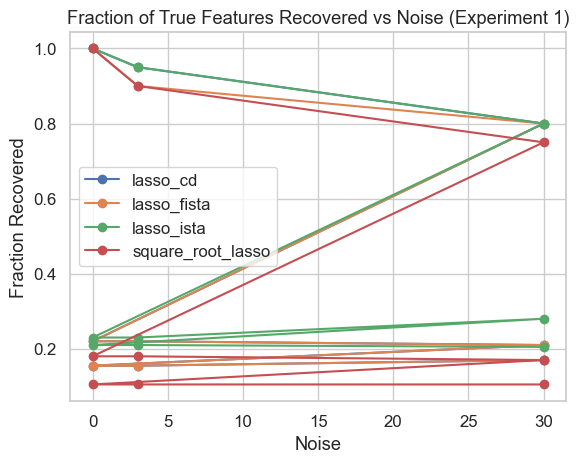

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.datasets import make_regression

# Import your Lasso methods (coordinate descent, ISTA, FISTA, etc.)
from methods.lasso_cd import lasso_coordinate_descent
from methods.lasso_fista import lasso_fista
from methods.lasso_ista import lasso_ista
from methods.square_root_lasso import square_root_lasso

######################################
# 1. CONFIGURATION
######################################
n_samples = 100
p = 1000
# noise_levels = [0, 1, 2]
noise_levels = [0, 3, 30]
# n_informative_list = [5, 10, 20]
n_informative_list = [20, 100, 200]

# We'll store the results in a list of dictionaries, then build a DataFrame.
results = []

######################################
# 2. EXPERIMENT LOOP
######################################
for n_informative in n_informative_list:
    for noise in noise_levels:
        # Generate synthetic data using make_regression
        X_data, y_data, true_coef = make_regression(
            n_samples=n_samples,
            n_features=p,
            n_informative=n_informative,
            noise=noise,
            coef=True,
            random_state=42  # for reproducibility
        )
        
        # Identify which coefficients are nonzero in the ground truth
        true_informative_indices = np.where(true_coef != 0)[0]
        
        # Standardize X and center y
        X_mean = np.mean(X_data, axis=0)
        X_std = np.std(X_data, axis=0)
        X_scaled = (X_data - X_mean) / (X_std + 1e-8)  # avoid division by zero
        y_centered = y_data - np.mean(y_data)
        
        # Choose a lambda/tau (this can be tuned or you can do multiple)
        lam = 0.1
        tau = 0.2
        
        # Dictionary for storing each method's results (including histories)
        method_results = {}
        
        #############################
        # 3. RUN LASSO_CD
        #############################
        start_time = time.time()
        beta_cd, beta_history_cd = lasso_coordinate_descent(
            X_scaled, y_centered,
            lam=lam,
            max_iter=100000,  # or some large number
            tol=1e-4
        )
        cd_time = time.time() - start_time
        
        # Evaluate the selection
        threshold = 0
        selected_indices_cd = np.where(np.abs(beta_cd) > threshold)[0]
        
        # Count overlap with true informative features
        common_cd = set(selected_indices_cd).intersection(set(true_informative_indices))
        fraction_recovered_cd = len(common_cd) / (len(true_informative_indices)+1e-8)
        false_pos_cd = len(selected_indices_cd) - len(common_cd)
        
        method_results["lasso_cd"] = {
            "beta": beta_cd,
            "beta_history": beta_history_cd,  # storing the history
            "time": cd_time,
            "n_selected": len(selected_indices_cd),
            "correct_count": len(common_cd),
            "false_positives": false_pos_cd,
            "fraction_recovered": fraction_recovered_cd
        }
        
        #############################
        # 4. RUN LASSO_FISTA
        #############################
        start_time = time.time()
        beta_fista, beta_history_fista = lasso_fista(
            X_scaled, y_centered,
            lam=lam,
            max_iter=100000,
            tol=1e-4
        )
        fista_time = time.time() - start_time
        
        selected_indices_fista = np.where(np.abs(beta_fista) > threshold)[0]
        common_fista = set(selected_indices_fista).intersection(set(true_informative_indices))
        fraction_recovered_fista = len(common_fista) / (len(true_informative_indices)+1e-8)
        false_pos_fista = len(selected_indices_fista) - len(common_fista)
        
        method_results["lasso_fista"] = {
            "beta": beta_fista,
            "beta_history": beta_history_fista,
            "time": fista_time,
            "n_selected": len(selected_indices_fista),
            "correct_count": len(common_fista),
            "false_positives": false_pos_fista,
            "fraction_recovered": fraction_recovered_fista
        }
        
        #############################
        # 5. RUN LASSO_ISTA
        #############################
        start_time = time.time()
        beta_ista, beta_history_ista = lasso_ista(
            X_scaled, y_centered,
            lam=lam,
            max_iter=100000,
            tol=1e-4
        )
        ista_time = time.time() - start_time
        
        selected_indices_ista = np.where(np.abs(beta_ista) > threshold)[0]
        common_ista = set(selected_indices_ista).intersection(set(true_informative_indices))
        fraction_recovered_ista = len(common_ista) / (len(true_informative_indices)+1e-8)
        false_pos_ista = len(selected_indices_ista) - len(common_ista)
        
        method_results["lasso_ista"] = {
            "beta": beta_ista,
            "beta_history": beta_history_ista,
            "time": ista_time,
            "n_selected": len(selected_indices_ista),
            "correct_count": len(common_ista),
            "false_positives": false_pos_ista,
            "fraction_recovered": fraction_recovered_ista
        }
        
        #############################
        # 6. RUN SQUARE-ROOT LASSO
        #############################
        start_time = time.time()
        beta_srl, sigma_srl, history_srl = square_root_lasso(
            X_scaled, y_centered,
            tau=tau,
            max_outer_iter=1000,
            tol=1e-4
        )
        srl_time = time.time() - start_time
        
        selected_indices_srl = np.where(np.abs(beta_srl) > threshold)[0]
        common_srl = set(selected_indices_srl).intersection(set(true_informative_indices))
        fraction_recovered_srl = len(common_srl) / (len(true_informative_indices)+1e-8)
        false_pos_srl = len(selected_indices_srl) - len(common_srl)
        
        method_results["square_root_lasso"] = {
            "beta": beta_srl,
            "beta_history": history_srl,
            "time": srl_time,
            "n_selected": len(selected_indices_srl),
            "correct_count": len(common_srl),
            "false_positives": false_pos_srl,
            "fraction_recovered": fraction_recovered_srl
        }
        
        # Append overall info to results, tagging each with the experiment name.
        for method_name, stats in method_results.items():
            results.append({
                "Experiment": "experiment_1",
                "Method": method_name,
                "n_informative": n_informative,
                "noise": noise,
                "time": stats["time"],
                "n_selected": stats["n_selected"],
                "correct_count": stats["correct_count"],
                "false_positives": stats["false_positives"],
                "fraction_recovered": stats["fraction_recovered"],
                "beta_history": stats["beta_history"]
            })

######################################
# 3. SAVE RESULTS AND VISUALIZE
######################################
df_results = pd.DataFrame(results)
display(df_results)

# Save the DataFrame (including histories) as a CSV file with experiment naming.
# df_results_experiment_1.to_csv("experiment_1_results_with_history.csv", index=False)

# (Optional) Plot: Fraction of True Features Recovered vs Noise.
for method in df_results["Method"].unique():
    df_m = df_results[df_results["Method"] == method]
    plt.plot(df_m["noise"], df_m["fraction_recovered"], marker='o', label=method)
plt.xlabel("Noise")
plt.ylabel("Fraction Recovered")
plt.title("Fraction of True Features Recovered vs Noise (Experiment 1)")
plt.legend()
plt.show()


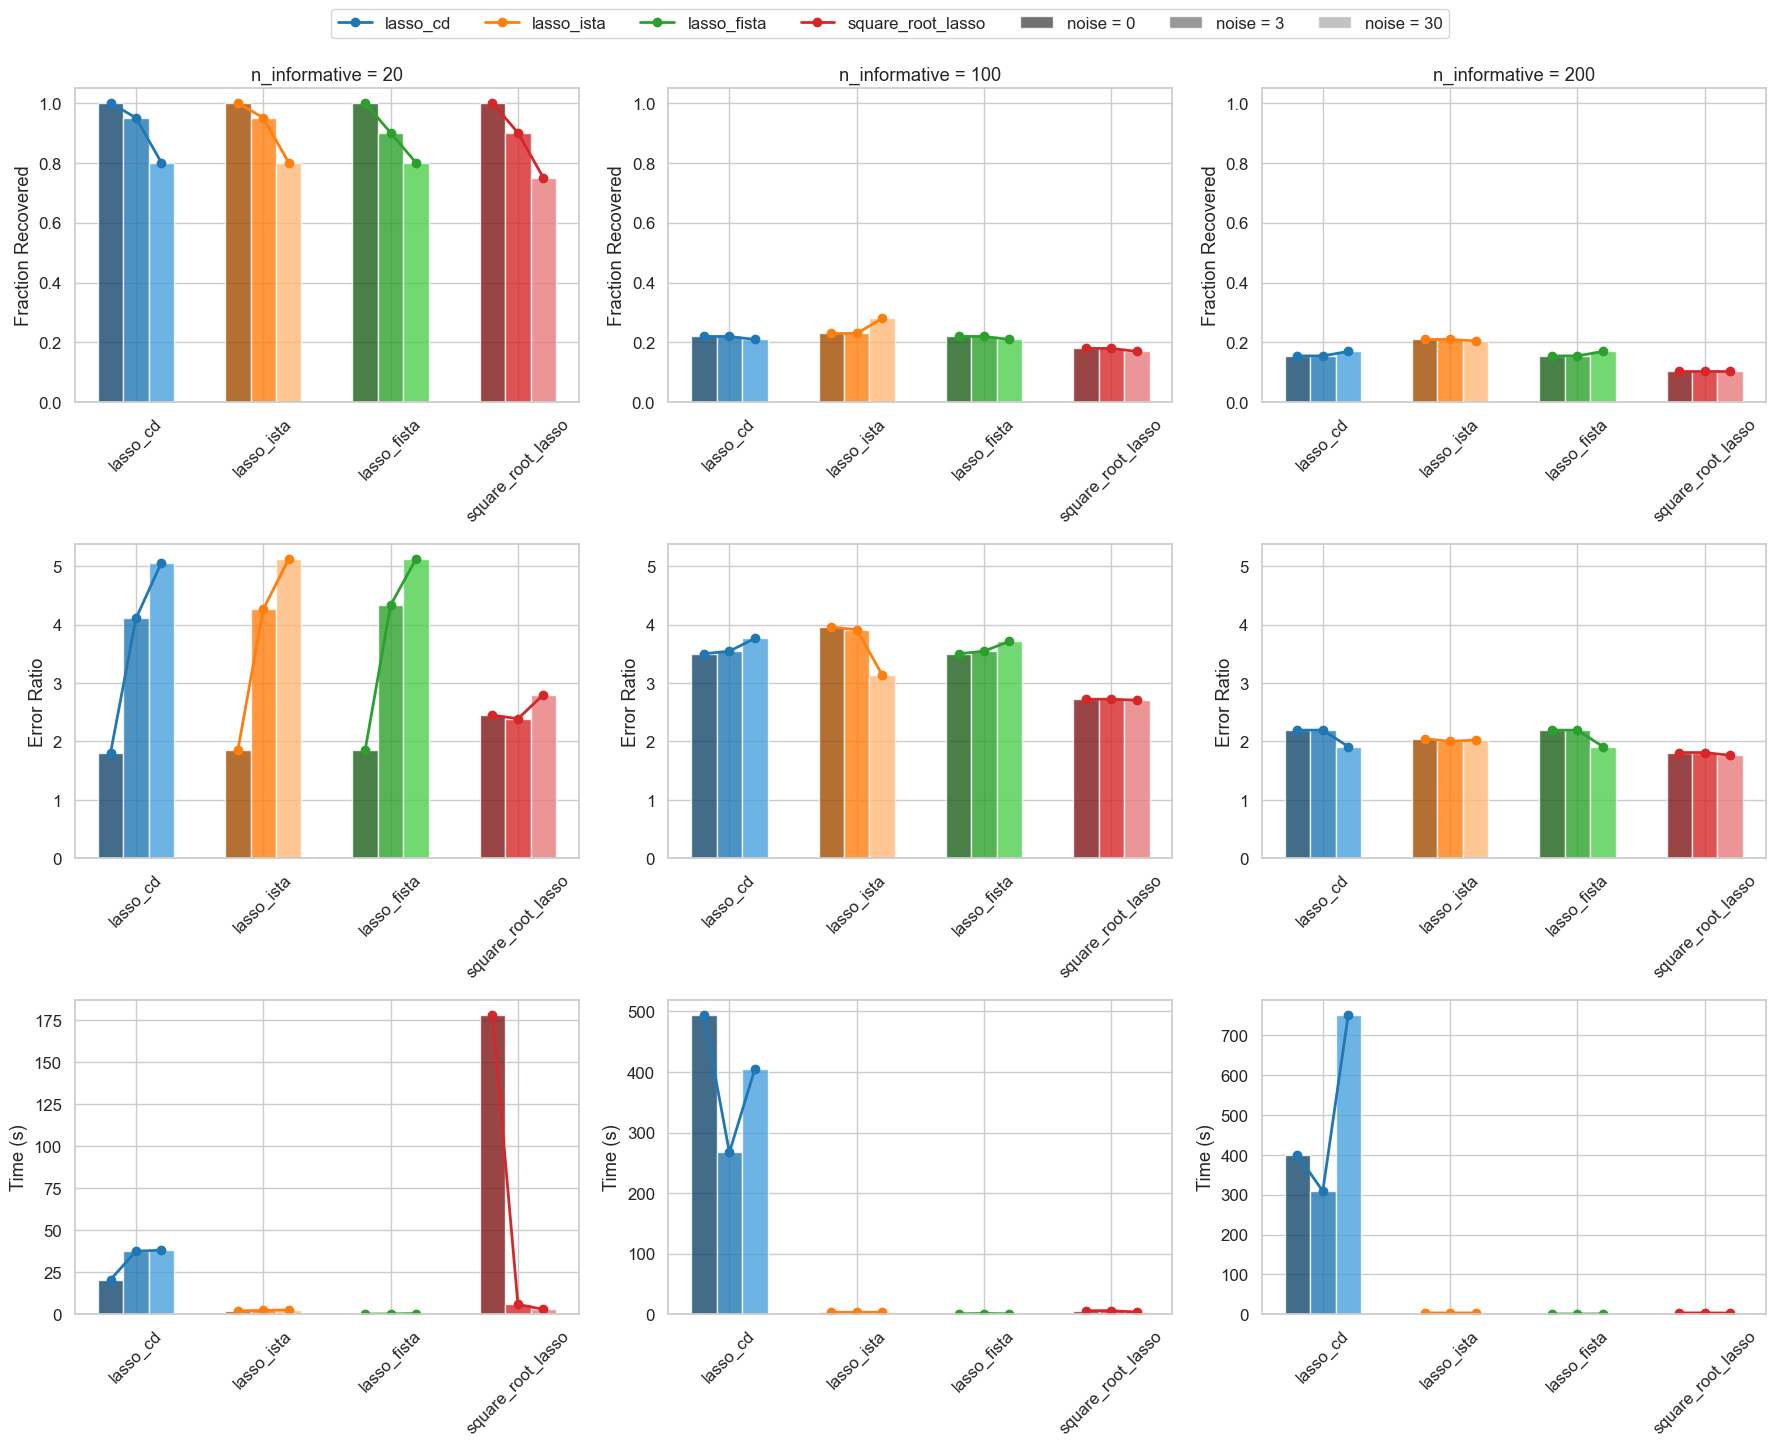

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mc
import colorsys
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

def lighten_color(color, amount=1.0):
    try:
        c = mc.cnames[color]
    except KeyError:
        c = color
    c = np.array(mc.to_rgb(c))
    h, l, s = colorsys.rgb_to_hls(*c)
    new_l = max(0, min(1, l * amount))
    return colorsys.hls_to_rgb(h, new_l, s)

# Assume df_results is already defined with your data.
n_informative_levels = sorted(df_results['n_informative'].unique())
noise_levels = df_results['noise'].unique()

# Change method order: ista appears before fista.
methods = ['lasso_cd', 'lasso_ista', 'lasso_fista', 'square_root_lasso']

# Define distinct base colors for each method.
method_colors = {
    'lasso_cd': 'tab:blue',
    'lasso_ista': 'tab:orange',
    'lasso_fista': 'tab:green',
    'square_root_lasso': 'tab:red'
}

# Define shade factors for noise levels.
shade_dict = {0: 0.6, 3: 1.0, 30: 1.4}

# Define metrics to plot: (label, lambda to compute value from sub_data)
metrics = [
    ("Fraction Recovered", lambda sub_data: sub_data['fraction_recovered'].values[0]),
    ("Error Ratio", lambda sub_data: sub_data['false_positives'].values[0] / sub_data['correct_count'].values[0]),
    ("Time (s)", lambda sub_data: sub_data['time'].values[0])
]

n_rows = len(metrics)
n_cols = len(n_informative_levels)

# Create a 3x3 grid without shared y-axis.
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 15), sharey=False)
bar_width = 0.2
x = np.arange(len(methods))  # base x positions for each method

for col_idx, n_inf in enumerate(n_informative_levels):
    data_n = df_results[df_results['n_informative'] == n_inf]
    for row_idx, (metric_label, value_func) in enumerate(metrics):
        ax = axes[row_idx, col_idx]
        
        # Plot bars for each method and noise level.
        for m_idx, method in enumerate(methods):
            for noise_idx, noise in enumerate(noise_levels):
                sub_data = data_n[(data_n['noise'] == noise) & (data_n['Method'] == method)]
                if not sub_data.empty:
                    val = value_func(sub_data)
                    x_loc = x[m_idx] + noise_idx * bar_width
                    base_color = method_colors[method]
                    bar_color = lighten_color(base_color, shade_dict[noise])
                    ax.bar(x_loc, val, width=bar_width, align='center', color=bar_color, alpha=0.8)
        
        # Connect the tops of the bars for each method.
        for m_idx, method in enumerate(methods):
            x_points = []
            y_points = []
            for noise_idx, noise in enumerate(noise_levels):
                sub_data = data_n[(data_n['noise'] == noise) & (data_n['Method'] == method)]
                if not sub_data.empty:
                    val = value_func(sub_data)
                    x_points.append(x[m_idx] + noise_idx * bar_width)
                    y_points.append(val)
            ax.plot(x_points, y_points, marker='o', color=method_colors[method],
                    linestyle='-', linewidth=2)
        
        if row_idx == 0:
            ax.set_title(f'n_informative = {n_inf}')
        ax.set_xticks(x + bar_width)
        ax.set_xticklabels(methods, rotation=45)
        ax.set_ylabel(metric_label)
        ax.tick_params(labelleft=True)

# For rows 0 and 1, compute and set a common y-axis across columns.
for row_idx in [0, 1]:
    ymins, ymaxs = [], []
    for col_idx in range(n_cols):
        ymin, ymax = axes[row_idx, col_idx].get_ylim()
        ymins.append(ymin)
        ymaxs.append(ymax)
    common_ylim = (min(ymins), max(ymaxs))
    for col_idx in range(n_cols):
        axes[row_idx, col_idx].set_ylim(common_ylim)
# Row 2 is left to auto-scale.

# Create a unified legend for the entire figure.
method_handles = [
    Line2D([0], [0], marker='o', color=method_colors[m], linestyle='-', linewidth=2, label=m)
    for m in methods
]
noise_handles = [
    Patch(facecolor=lighten_color('gray', shade_dict[noise]), alpha=0.8, label=f'noise = {noise}')
    for noise in noise_levels
]
handles = method_handles + noise_handles
fig.legend(handles=handles, loc='upper center', ncol=len(handles), bbox_to_anchor=(0.5, 0.97))

plt.tight_layout(rect=[0, 0, 1, 0.94])

# Save the figure as a PDF.
plt.savefig("expermint1.pdf", format='pdf')
plt.show()


In [23]:
import matplotlib.pyplot as plt

def plot_coefficient_evolution(beta_history_arr, selected_indices, total_features,
                               color_selected="tab:green", color_not_selected="tab:gray"):
    """
    Plots the evolution of the coefficients over iterations in three subplots:
      1. Combined view: All features (selected in color_selected, not selected in color_not_selected).
      2. Unselected features only.
      3. Selected features only.
      
    All subplots share the same y-axis.
    
    Parameters:
      - beta_history_arr: 2D array with shape (n_iterations, total_features).
      - selected_indices: List or array of indices of features deemed "selected".
      - total_features: Total number of features (columns in beta_history_arr).
      - color_selected: Color for selected features (default: "tab:green").
      - color_not_selected: Color for unselected features (default: "tab:gray").
    """
    n_selected = len(selected_indices)
    n_not_selected = total_features - n_selected

    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 18), sharey=True)

    # Subplot 1: Combined view.
    ax = axes[0]
    for i in range(total_features):
        if i in selected_indices:
            ax.plot(beta_history_arr[:, i], color=color_selected, linewidth=0.5, alpha=0.5)
        else:
            ax.plot(beta_history_arr[:, i], color=color_not_selected, linewidth=0.5, alpha=0.5)
    # Create invisible plots for the legend.
    ax.plot([], [], color=color_selected, linewidth=1, label=f'Selected features ({n_selected})')
    ax.plot([], [], color=color_not_selected, linewidth=1, alpha=0.5, label=f'Not selected ({n_not_selected})')
    ax.set_title("Combined: All Features")
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Coefficient Value")
    ax.legend(loc="best", fontsize='small', ncol=2)

    # Subplot 2: Unselected features.
    ax = axes[1]
    for i in range(total_features):
        if i not in selected_indices:
            ax.plot(beta_history_arr[:, i], color=color_not_selected, linewidth=0.5, alpha=0.5)
    ax.set_title(f"Unselected Features ({n_not_selected})")
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Coefficient Value")

    # Subplot 3: Selected features.
    ax = axes[2]
    for i in selected_indices:
        ax.plot(beta_history_arr[:, i], color=color_selected, linewidth=0.5, alpha=0.5)
    ax.set_title(f"Selected Features ({n_selected})")
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Coefficient Value")

    plt.tight_layout()
    plt.show()


# Expermint 2

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from methods.lasso_cd import lasso_coordinate_descent
from methods.lasso_fista import lasso_fista
from methods.lasso_ista import lasso_ista
from methods.square_root_lasso import square_root_lasso

########################################
# 1. DATA GENERATION: TOEPLITZ
########################################
def generate_toeplitz_data(n, p, rho, n_informative, noise_std, random_state=None):
    """
    Generate synthetic regression data with Toeplitz correlation structure among features.
    
    X ~ N(0, Sigma), where Sigma_{ij} = rho^|i-j|.
    The true beta has n_informative nonzero coefficients (randomly placed).
    y = X beta + epsilon, with epsilon ~ N(0, noise_std^2).
    
    Returns:
      X_data   : shape (n, p)
      y_data   : shape (n,)
      true_beta: shape (p,)
    """
    if random_state is not None:
        np.random.seed(random_state)
    
    # Step 1: Build covariance matrix
    Sigma = np.zeros((p, p))
    for i in range(p):
        for j in range(p):
            Sigma[i, j] = rho ** abs(i - j)
    
    # Step 2: Sample X from multivariate normal
    mean_vec = np.zeros(p)
    # We'll use a Cholesky decomposition or a symmetric sqrt for Sigma
    # to generate from N(0, Sigma).
    # For numerical stability, you might do np.linalg.cholesky(Sigma).
    cholSigma = np.linalg.cholesky(Sigma)
    
    # X_data: shape (n, p)
    # Each row is a sample from N(0, Sigma).
    standard_norm = np.random.randn(n, p)  # shape (n, p)
    X_data = standard_norm @ cholSigma
    
    # Step 3: Construct sparse true_beta
    true_beta = np.zeros(p)
    # Randomly pick n_informative indices
    informative_indices = np.random.choice(p, size=n_informative, replace=False)
    # Assign random coefficients in e.g. [5, 10] or smaller
    # Or you can let them be random normal, or a fixed magnitude.
    for idx in informative_indices:
        true_beta[idx] = np.random.uniform(5, 10) * np.random.choice([1, -1])
    
    # Step 4: Generate y
    y_data = X_data @ true_beta
    # Add Gaussian noise
    eps = np.random.randn(n) * noise_std
    y_data += eps
    
    return X_data, y_data, true_beta


########################################
# 2. EXPERIMENT FUNCTION
########################################
def run_experiment_correlated(
    n=100,
    p=1000,
    rho_list=[0.0, 0.5, 0.9],
    n_informative=20,
    noise_std=1.0,
    lam=0.1,
    tau=0.2,
    random_state=42
):
    """
    For each rho in rho_list, generate Toeplitz data, run each Lasso method,
    and record results.
    """
    results = []
    
    for rho in rho_list:
        # Generate the correlated dataset
        X_data, y_data, true_beta = generate_toeplitz_data(
            n=n, p=p, rho=rho,
            n_informative=n_informative,
            noise_std=noise_std,
            random_state=random_state
        )
        
        # Find the true nonzero indices
        true_informative_indices = np.where(true_beta != 0)[0]
        
        # Standardize X and center y
        X_mean = np.mean(X_data, axis=0)
        X_std = np.std(X_data, axis=0) + 1e-8
        X_scaled = (X_data - X_mean) / X_std
        y_centered = y_data - np.mean(y_data)
        
        # We'll run the 4 Lasso methods
        lasso_methods = {
            "lasso_cd": lambda X, y: lasso_coordinate_descent(X, y, lam=lam),
            "lasso_fista": lambda X, y: lasso_fista(X, y, lam=lam),
            "lasso_ista": lambda X, y: lasso_ista(X, y, lam=lam),
            "square_root_lasso": lambda X, y: square_root_lasso(X, y, tau=tau)
        }
        
        for method_name, func in lasso_methods.items():
            # Run the method
            start_time = time.time()
            
            if method_name == "square_root_lasso":
                beta_est, sigma_est, history = func(X_scaled, y_centered)
            else:
                beta_est, history = func(X_scaled, y_centered)
            
            elapsed = time.time() - start_time
            
            # Evaluate selection
            threshold = 1e-1
            selected_indices = np.where(np.abs(beta_est) > threshold)[0]
            common = set(selected_indices).intersection(set(true_informative_indices))
            
            fraction_recovered = len(common) / (len(true_informative_indices) + 1e-8)
            false_positives = len(selected_indices) - len(common)
            
            # Save results
            results.append({
                "Method": method_name,
                "rho": rho,
                "n": n,
                "p": p,
                "noise": noise_std,
                "n_informative": n_informative,
                "time": elapsed,
                "n_selected": len(selected_indices),
                "correct_count": len(common),
                "false_positives": false_positives,
                "fraction_recovered": fraction_recovered
            })
    return pd.DataFrame(results)


########################################
# 3. RUN THE EXPERIMENT
########################################
if __name__ == "__main__":
    df_corr = run_experiment_correlated(
        n=100,
        p=1000,
        rho_list=[0.0, 0.9, 0.9999],
        n_informative=20,
        noise_std=1.0,
        lam=0.1,
        tau=0.2,
        random_state=42
    )
    
    print(df_corr)
    

df_corr

Converged at iteration 1865
FISTA converged at iteration 3164
FISTA converged at iteration 476
FISTA converged at iteration 707
FISTA converged at iteration 846
FISTA converged at iteration 1023
FISTA converged at iteration 1140
FISTA converged at iteration 1201
FISTA converged at iteration 2169
FISTA converged at iteration 2176
FISTA converged at iteration 1737
FISTA converged at iteration 1909
FISTA converged at iteration 2135
FISTA converged at iteration 2387
FISTA converged at iteration 2436
FISTA converged at iteration 2195
FISTA converged at iteration 2196
FISTA converged at iteration 2196
FISTA converged at iteration 2461
FISTA converged at iteration 2367
FISTA converged at iteration 2723
FISTA converged at iteration 2678
FISTA converged at iteration 2297
FISTA converged at iteration 2976
FISTA converged at iteration 2986
FISTA converged at iteration 2841
FISTA converged at iteration 2843
FISTA converged at iteration 2845
FISTA converged at iteration 2789
FISTA converged at iter

,Method,rho,n,p,noise,n_informative,time,n_selected,correct_count,false_positives,fraction_recovered
0,lasso_cd,0.0000,100,1000,1.0,20,18.430865,88,18,70,0.90
1,lasso_fista,0.0000,100,1000,1.0,20,0.116039,88,18,70,0.90
2,lasso_ista,0.0000,100,1000,1.0,20,0.168624,99,18,81,0.90
3,square_root_lasso,0.0000,100,1000,1.0,20,7.872004,69,17,52,0.85
4,lasso_cd,0.9000,100,1000,1.0,20,25.370120,82,14,68,0.70
5,lasso_fista,0.9000,100,1000,1.0,20,0.170381,82,14,68,0.70
6,lasso_ista,0.9000,100,1000,1.0,20,0.164927,111,14,97,0.70
7,square_root_lasso,0.9000,100,1000,1.0,20,4.400261,40,11,29,0.55
8,lasso_cd,0.9999,100,1000,1.0,20,21.794093,26,2,24,0.10
9,lasso_fista,0.9999,100,1000,1.0,20,0.174868,26,2,24,0.10


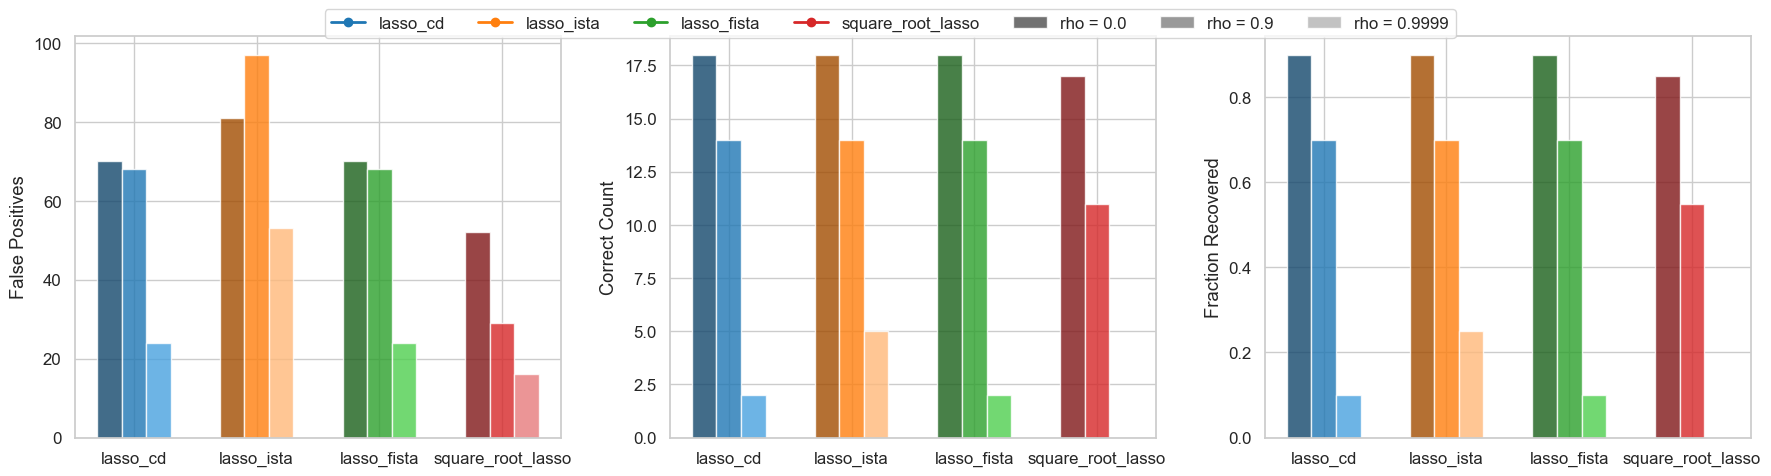

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mc
import colorsys
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

def lighten_color(color, amount=1.0):
    try:
        c = mc.cnames[color]
    except KeyError:
        c = color
    c = np.array(mc.to_rgb(c))
    h, l, s = colorsys.rgb_to_hls(*c)
    new_l = max(0, min(1, l * amount))
    return colorsys.hls_to_rgb(h, new_l, s)

# Assume df_corr is already defined with your data.
# (Columns: Method, rho, n, p, noise, n_informative, time, n_selected, correct_count, false_positives, fraction_recovered)

# We fix n_informative to a target value, e.g., 20.
n_inf_target = 20
df_plot = df_corr[df_corr['n_informative'] == n_inf_target]

# Define the rho values (noise levels) to use.
rho_list = [0.0, 0.9, 0.9999]

# Define the methods in desired order.
methods = ['lasso_cd', 'lasso_ista', 'lasso_fista', 'square_root_lasso']

# Base colors for each method.
method_colors = {
    'lasso_cd': 'tab:blue',
    'lasso_ista': 'tab:orange',
    'lasso_fista': 'tab:green',
    'square_root_lasso': 'tab:red'
}

# Define shade factors for each rho.
shade_dict = {0.0: 0.6, 0.9: 1.0, 0.9999: 1.4}

# Define metrics to plot: (Metric Label, Column Name)
metrics = [
    ("False Positives", "false_positives"),
    ("Correct Count", "correct_count"),
    ("Fraction Recovered", "fraction_recovered")
]

n_metrics = len(metrics)
n_methods = len(methods)
n_rhos = len(rho_list)
bar_width = 0.2

# Create a 1x3 grid (one row, three columns).
fig, axes = plt.subplots(1, n_metrics, figsize=(18, 5), sharey=False)
x = np.arange(n_methods)  # base positions for method groups

# Loop over each metric subplot.
for i, (metric_label, col_name) in enumerate(metrics):
    ax = axes[i]
    # For each rho value, plot bars for each method.
    for j, rho in enumerate(rho_list):
        # Compute offset so that the 3 bars for each method are side-by-side.
        offset = (j - (n_rhos - 1) / 2) * bar_width
        values = []
        bar_colors = []
        for method in methods:
            sub_data = df_plot[(df_plot['Method'] == method) &
                               (df_plot['rho'].round(4) == round(rho, 4))]
            if not sub_data.empty:
                val = sub_data[col_name].values[0]
            else:
                val = np.nan
            values.append(val)
            base_color = method_colors[method]
            bar_colors.append(lighten_color(base_color, shade_dict[rho]))
        ax.bar(x + offset, values, width=bar_width, color=bar_colors, alpha=0.8, label=f"rho = {rho}")
    ax.set_xticks(x)
    ax.set_xticklabels(methods)
    # ax.set_xlabel("Method")
    ax.set_ylabel(metric_label)
    # ax.set_title(metric_label)

# Create a unified legend at the top.
method_handles = [
    Line2D([0], [0], marker='o', color=method_colors[m], linestyle='-', linewidth=2, label=m)
    for m in methods
]
# Noise legend in grayscale.
noise_handles = [
    Patch(facecolor=lighten_color('gray', shade_dict[rho]), alpha=0.8, label=f"rho = {rho}")
    for rho in rho_list
]
handles = method_handles + noise_handles
fig.legend(handles=handles, loc="upper center", ncol=len(handles), bbox_to_anchor=(0.5, 0.97))

plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.savefig("expermint2.pdf", format='pdf')

plt.show()


Converged at iteration 515
FISTA converged at iteration 679
ISTA converged at iteration 4444
FISTA converged at iteration 186
FISTA converged at iteration 196
FISTA converged at iteration 210
FISTA converged at iteration 235
FISTA converged at iteration 279
FISTA converged at iteration 282
FISTA converged at iteration 283
FISTA converged at iteration 286
FISTA converged at iteration 304
FISTA converged at iteration 319
FISTA converged at iteration 321
FISTA converged at iteration 323
FISTA converged at iteration 312
FISTA converged at iteration 327
FISTA converged at iteration 330
FISTA converged at iteration 344
FISTA converged at iteration 389
FISTA converged at iteration 412
FISTA converged at iteration 401
FISTA converged at iteration 404
FISTA converged at iteration 437
FISTA converged at iteration 426
FISTA converged at iteration 369
FISTA converged at iteration 439
FISTA converged at iteration 427
FISTA converged at iteration 431
FISTA converged at iteration 450
FISTA converged 

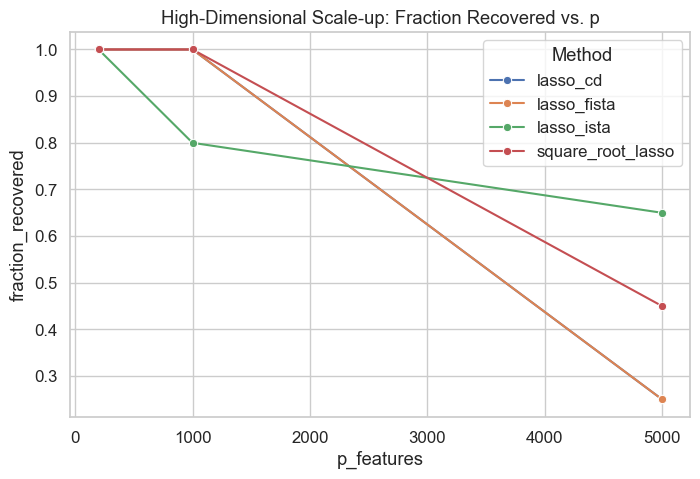

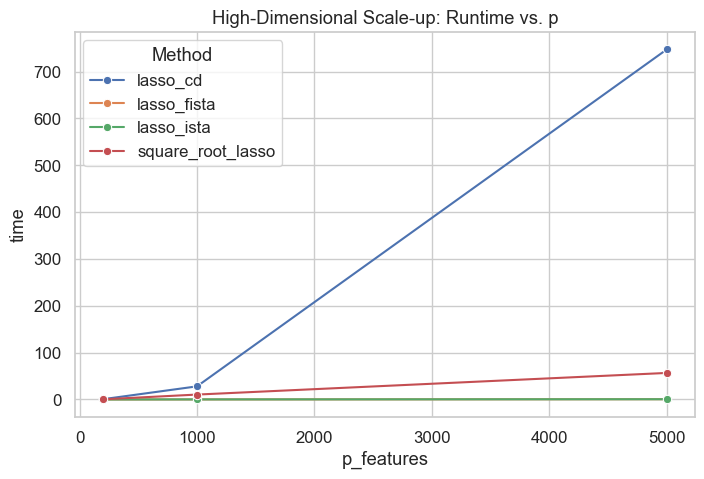

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.datasets import make_regression

# Import your Lasso methods
from methods.lasso_cd import lasso_coordinate_descent
from methods.lasso_fista import lasso_fista
from methods.lasso_ista import lasso_ista
from methods.square_root_lasso import square_root_lasso

def experiment_vary_p(
    n=100,
    p_list=[200, 500, 1000, 2000],
    n_informative=20,
    noise=3.0,
    lam=0.1,
    tau=0.2,
    random_state=42
):
    """
    Runs an experiment where we fix n, vary p, and check how Lasso methods scale up.
    Returns a DataFrame summarizing the results.
    """
    results = []
    for p in p_list:
        # 1. Generate data
        X_data, y_data, true_coef = make_regression(
            n_samples=n,
            n_features=p,
            n_informative=n_informative,
            noise=noise,
            coef=True,
            random_state=random_state
        )
        
        # Identify the true nonzero indices
        true_informative_indices = np.where(true_coef != 0)[0]
        
        # 2. Standardize and center
        X_mean = np.mean(X_data, axis=0)
        X_std = np.std(X_data, axis=0) + 1e-8
        X_scaled = (X_data - X_mean) / X_std
        y_centered = y_data - np.mean(y_data)
        
        # 3. Run each Lasso method
        lasso_methods = {
            "lasso_cd": lambda X, y: lasso_coordinate_descent(X, y, lam=lam),
            "lasso_fista": lambda X, y: lasso_fista(X, y, lam=lam),
            "lasso_ista": lambda X, y: lasso_ista(X, y, lam=lam),
            "square_root_lasso": lambda X, y: square_root_lasso(X, y, tau=tau)
        }
        
        for method_name, func in lasso_methods.items():
            start_time = time.time()
            if method_name == "square_root_lasso":
                beta_est, sigma_est, history_srl = func(X_scaled, y_centered)
            else:
                beta_est, beta_history = func(X_scaled, y_centered)
            elapsed = time.time() - start_time
            
            # 4. Evaluate selection
            threshold = 1e-2
            selected_indices = np.where(np.abs(beta_est) > threshold)[0]
            common = set(selected_indices).intersection(set(true_informative_indices))
            
            fraction_recovered = len(common) / (len(true_informative_indices) + 1e-8)
            false_positives = len(selected_indices) - len(common)
            
            # Optionally measure coefficient error as well
            # l2_error = np.linalg.norm(beta_est - true_coef, ord=2)
            
            results.append({
                "Method": method_name,
                "n_samples": n,
                "p_features": p,
                "n_informative": n_informative,
                "noise": noise,
                "time": elapsed,
                "n_selected": len(selected_indices),
                "correct_count": len(common),
                "false_positives": false_positives,
                "fraction_recovered": fraction_recovered
                # "l2_error": l2_error
            })
    return pd.DataFrame(results)

# Example usage:
if __name__ == "__main__":
    p_list = [200, 1000, 5000]
    df_scaleup = experiment_vary_p(
        n=100,
        p_list=p_list,
        n_informative=20,
        noise=1.0,
        lam=0.1,
        tau=0.2,
        random_state=42
    )
    
    print(df_scaleup)
    
    # Quick plot: fraction recovered vs. p, color-coded by method
    import seaborn as sns
    sns.set(style="whitegrid", font_scale=1.1)
    
    plt.figure(figsize=(8,5))
    sns.lineplot(
        data=df_scaleup,
        x="p_features",
        y="fraction_recovered",
        hue="Method",
        marker="o"
    )
    plt.title("High-Dimensional Scale-up: Fraction Recovered vs. p")
    plt.show()
    
    # Another plot: runtime vs. p
    plt.figure(figsize=(8,5))
    sns.lineplot(
        data=df_scaleup,
        x="p_features",
        y="time",
        hue="Method",
        marker="o"
    )
    plt.title("High-Dimensional Scale-up: Runtime vs. p")
    plt.show()


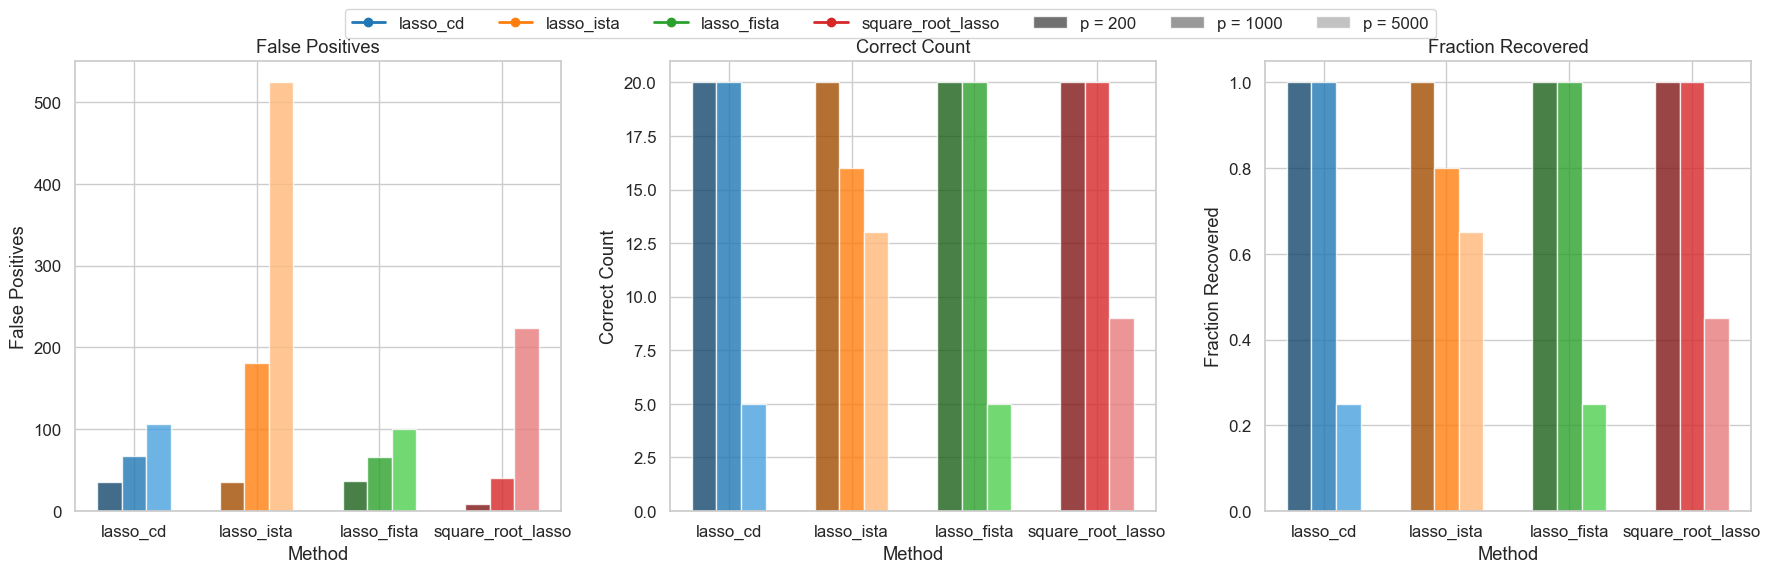

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mc
import colorsys
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

def lighten_color(color, amount=1.0):
    """Return a lightened/darkened version of the given color."""
    try:
        c = mc.cnames[color]
    except KeyError:
        c = color
    c = np.array(mc.to_rgb(c))
    h, l, s = colorsys.rgb_to_hls(*c)
    new_l = max(0, min(1, l * amount))
    return colorsys.hls_to_rgb(h, new_l, s)

# Assume df_scaleup is already defined with your data.
# Expected columns: Method, n_samples, p_features, n_informative, noise, time, n_selected,
# correct_count, false_positives, fraction_recovered

# We'll group the data by p_features (dimensions) using the following list:
pfeatures_list = [200, 1000, 5000]

# Fix a target value for n_informative if desired (here, e.g., 20)
n_inf_target = 20
df_plot = df_scaleup[df_scaleup['n_informative'] == n_inf_target]

# Define the four methods in the desired order.
methods = ['lasso_cd', 'lasso_ista', 'lasso_fista', 'square_root_lasso']

# Define the base colors for each method.
method_colors = {
    'lasso_cd': 'tab:blue',
    'lasso_ista': 'tab:orange',
    'lasso_fista': 'tab:green',
    'square_root_lasso': 'tab:red'
}

# Define shade factors for each p_features value.
shade_dict = {200: 0.6, 1000: 1.0, 5000: 1.4}

# Define the metrics to plot: (Metric Label, Column Name)
metrics = [
    ("False Positives", "false_positives"),
    ("Correct Count", "correct_count"),
    ("Fraction Recovered", "fraction_recovered")
]

n_metrics = len(metrics)  # 3 metrics
n_methods = len(methods)  # 4 methods
n_pfeatures = len(pfeatures_list)  # 3 groups per method
bar_width = 0.2

# Create a 1x3 grid (one row, three columns) of subplots.
fig, axes = plt.subplots(1, n_metrics, figsize=(18, 6), sharey=False)
x = np.arange(n_methods)  # base x positions for each method

# Loop over each metric subplot.
for i, (metric_label, col_name) in enumerate(metrics):
    ax = axes[i]
    # For each p_features value, plot bars for each method.
    for j, p_feat in enumerate(pfeatures_list):
        # Compute offset so that the 3 bars (for 200, 1000, 5000) are side-by-side.
        offset = (j - (n_pfeatures - 1) / 2) * bar_width
        values = []
        bar_colors = []
        for method in methods:
            sub_data = df_plot[(df_plot['Method'] == method) & (df_plot['p_features'] == p_feat)]
            if not sub_data.empty:
                val = sub_data[col_name].values[0]
            else:
                val = np.nan
            values.append(val)
            base_color = method_colors[method]
            bar_colors.append(lighten_color(base_color, shade_dict[p_feat]))
        ax.bar(x + offset, values, width=bar_width, color=bar_colors, alpha=0.8, label=f"p = {p_feat}")
    ax.set_xticks(x)
    ax.set_xticklabels(methods)
    ax.set_xlabel("Method")
    ax.set_ylabel(metric_label)
    ax.set_title(metric_label)

# Create a unified legend at the top.
# Legend for methods: use the base colors.
method_handles = [
    Line2D([0], [0], marker='o', color=method_colors[m], linestyle='-', linewidth=2, label=m)
    for m in methods
]
# Legend for p_features: use gray as the base for clarity.
pfeatures_handles = [
    Patch(facecolor=lighten_color('gray', shade_dict[p_feat]), alpha=0.8, label=f"p = {p_feat}")
    for p_feat in pfeatures_list
]
handles = method_handles + pfeatures_handles
fig.legend(handles=handles, loc="upper center", ncol=len(handles), bbox_to_anchor=(0.5, 0.97))

plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.savefig("expermint3.pdf", format='pdf')
plt.show()
